In [ ]:
import networkx as nx

### Using Karate network graph

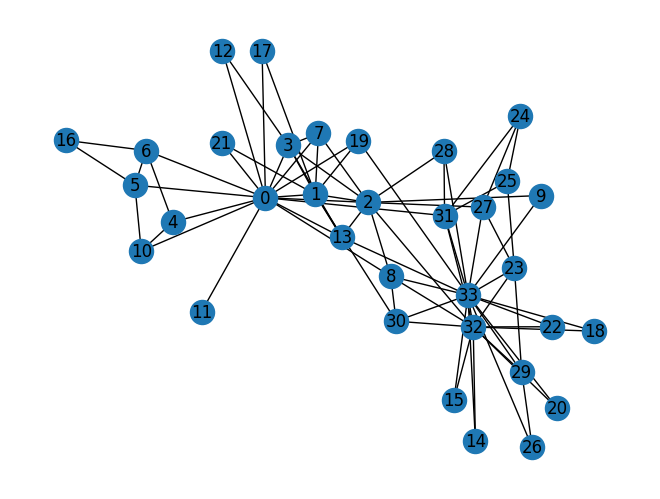

In [ ]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True)
n=G.number_of_nodes()
edges=[e for e in G.edges]

### STRESS CENTRALITY OF ALL NODES

In [ ]:
from collections import deque

inf=1000000000

def recover_path(par,s,e,path,bc):
  if e==s:
    for ver in path[:-1]:
      bc[ver]+=1 #increasing number of shortest paths
    return
  for p in par[e]:
    path.append(p)
    recover_path(par,s,p,path,bc)
    path.pop()

def STRESS_CENTRALITY(n,edges,dir,iswtd):
  adj=[[] for i in range(n)]
  for e in edges:
    if iswtd is True:
      adj[e[0]].append([e[1],e[2]])
    else:
      adj[e[0]].append(e[1])
      if dir is False:
        adj[e[1]].append(e[0])
  stress_cen=[0 for i in range(n)]
  for src in range(n):
    par=[[] for i in range(n)]
    dist=[inf for i in range(n)]
    q = deque()
    q.append(src)
    dist[src]=0
    while q:
      u=q[0]
      q.popleft()
      for v in adj[u]:
        cost=1
        ver=v
        if iswtd is True:
          cost=v[1]
          ver=v[0]
        if(dist[ver]>dist[u]+cost):
          dist[ver]=dist[u]+cost
          par[ver].clear()
          par[ver].append(u)
          q.append(ver)
        elif(dist[ver]==dist[u]+cost):
          par[ver].append(u)
    
    for dst in range(n):
      if src!=dst and dist[dst]!=inf:
        SC=[0 for i in range(n)]
        recover_path(par,src,dst,[],SC)
        for v in range(n):
          stress_cen[v]+=SC[v]
  
  for v in range(n):
    stress_cen[v]/=2
  return stress_cen
    


#### Verifier for the above functions

In [ ]:
def ver_SC(G):
    SC = [ 0 for i in range(G.number_of_nodes())]
    for source in G.nodes():
        for target in G.nodes():
            if source != target and nx.has_path(G, source, target):
                shortest_paths = nx.all_shortest_paths(G, source, target)
                for path in shortest_paths:
                    for node in path[1:-1]:
                        SC[node]+=1
    for i in range(len(SC)):
      SC[i]/=2
    return SC

#### Calculating Stress Centality for $G$

In [ ]:
SC=STRESS_CENTRALITY(n,edges,False,False)
print(SC)

[843.0, 133.0, 241.0, 29.0, 1.0, 85.0, 85.0, 0.0, 203.0, 4.0, 1.0, 0.0, 0.0, 154.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 0.0, 0.0, 0.0, 29.0, 3.0, 14.0, 0.0, 46.0, 6.0, 5.0, 54.0, 293.0, 376.0, 627.0]


In [ ]:
print(ver_SC(G))

[843.0, 133.0, 241.0, 29.0, 1.0, 85.0, 85.0, 0.0, 203.0, 4.0, 1.0, 0.0, 0.0, 154.0, 0.0, 0.0, 0.0, 0.0, 0.0, 130.0, 0.0, 0.0, 0.0, 29.0, 3.0, 14.0, 0.0, 46.0, 6.0, 5.0, 54.0, 293.0, 376.0, 627.0]


## 1. Brute force implementation for verification

#### 1.1 Iterating over all pairs of edges, updating the optimal edge and minimum stress centrality for each node

In [ ]:
import copy
def find_optimal_edge(n,edges,SC):
  MSC = copy.deepcopy(SC)
  opt_edge=dict()
  cnt=0
  for u in range(n):
    for v in range(u+1,n):
      if (u,v) not in edges: # adding the edge which is not present
        edges.append((u,v))
        temp_SC = STRESS_CENTRALITY(n,edges,False,False)
        
        for node in range(n):
          if MSC[node] > temp_SC[node]:
            MSC[node] = temp_SC[node]
            opt_edge[node]=(u,v)
        edges.pop()
        cnt+=1
  return MSC,opt_edge

In [ ]:
import copy
def ver_foe(G):
  MSC = ver_SC(G)
  opt_edge=dict()
  for u in range(n):
    for v in range(u+1,n):
      if G.has_edge(u,v) is False:
        G.add_edge(u,v)
        temp_SC = ver_SC(G)
        
        for node in range(n):
          if MSC[node] > temp_SC[node]:
            MSC[node] = temp_SC[node]
            opt_edge[node]=(u,v)
        
        G.remove_edge(u,v)
  return MSC,opt_edge

#### 1.3 In case finding the edges which result is maximum overall reduction in stress centrality of $G$

In [ ]:
import copy
def find_k_opt_edges(n,edges,SC):
  opt_edge=dict()
  for u in range(n):
    for v in range(u+1,n):
      if (u,v) not in edges:
        edges.append((u,v))
        temp_SC = STRESS_CENTRALITY(n,edges,False,False)
        score=0
        for node in range(n):
          score+=(temp_SC[node] - SC[node])
        opt_edge[(u,v)] = score
        edges.pop()
  opt_edge = sorted(opt_edge.items(), key=lambda x:x[1])
  print(opt_edge)


In [ ]:
find_k_opt_edges(n,edges,SC)

[((0, 33), -1970.0), ((0, 32), -1736.0), ((16, 33), -741.0), ((5, 23), -727.0), ((6, 23), -727.0), ((5, 33), -725.0), ((6, 33), -725.0), ((16, 32), -712.0), ((5, 29), -690.0), ((6, 29), -690.0), ((4, 33), -677.0), ((10, 33), -677.0), ((5, 26), -667.0), ((5, 32), -667.0), ((6, 26), -667.0), ((6, 32), -667.0), ((5, 14), -652.0), ((5, 15), -652.0), ((5, 18), -652.0), ((5, 20), -652.0), ((5, 22), -652.0), ((6, 14), -652.0), ((6, 15), -652.0), ((6, 18), -652.0), ((6, 20), -652.0), ((6, 22), -652.0), ((4, 32), -626.0), ((10, 32), -626.0), ((17, 23), -523.0), ((21, 23), -523.0), ((5, 19), -511.0), ((6, 19), -511.0), ((5, 27), -508.0), ((6, 27), -508.0), ((5, 9), -498.0), ((6, 9), -498.0), ((16, 29), -497.0), ((5, 28), -492.0), ((6, 28), -492.0), ((16, 23), -489.0), ((14, 17), -488.0), ((14, 21), -488.0), ((15, 17), -488.0), ((15, 21), -488.0), ((17, 18), -488.0), ((17, 20), -488.0), ((17, 22), -488.0), ((18, 21), -488.0), ((20, 21), -488.0), ((21, 22), -488.0), ((5, 13), -485.0), ((6, 13), -4

### Minimum stress centrality we can achieve for each node by addition of one edge

In [ ]:
MinSC,opt_edges=find_optimal_edge(n,edges,SC)
for node in range(n):
  print(MinSC[node],":",opt_edges.get(node,-1))

412.0 : (0, 33)
43.0 : (0, 33)
115.0 : (0, 32)
9.0 : (2, 12)
0.0 : (6, 10)
2.0 : (0, 16)
2.0 : (0, 16)
0.0 : -1
23.0 : (0, 33)
0.0 : (2, 33)
0.0 : (4, 5)
0.0 : -1
0.0 : -1
20.0 : (0, 33)
0.0 : -1
0.0 : -1
0.0 : -1
0.0 : -1
0.0 : -1
9.0 : (0, 33)
0.0 : -1
0.0 : -1
0.0 : -1
9.0 : (25, 33)
1.0 : (25, 27)
2.0 : (23, 31)
0.0 : -1
26.0 : (2, 23)
2.0 : (2, 33)
2.0 : (26, 32)
4.0 : (1, 33)
104.0 : (0, 33)
107.0 : (0, 33)
282.0 : (0, 32)


In [ ]:
MinSC,_=ver_foe(G)
print(MinSC)

[412.0, 43.0, 115.0, 9.0, 0.0, 2.0, 2.0, 0.0, 23.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 9.0, 1.0, 2.0, 0.0, 26.0, 2.0, 2.0, 4.0, 104.0, 107.0, 282.0]


## GREEDY APPROACH

In [ ]:
def max_reduction_stress_centrality(G,n,edges,SC_node,SC):
  # edge to be added
  opt_edge=()

  # the concerned node is Node '0'
  Nb = [ i for i in G.neighbors(SC_node)]

  # min stress centrality we can achieve
  ssc = SC[SC_node]
  # between neighbor
  for i in range(len(Nb)):
    for j in range(i+1,len(Nb)):
      u=min(Nb[i],Nb[j])
      v=max(Nb[i],Nb[j])
      if (u,v) not in edges:
        edges.append((u,v))
        temp_sc = STRESS_CENTRALITY(n,edges,False,False)[SC_node]
        if temp_sc<ssc:
          opt_edge = (u,v)
          ssc = temp_sc
        edges.pop()

  # of shortest path reduction
  NoSP = dict()
  # using levelwise bfs parallely from all neighbour
  vis = [ False for i in range(n)]
  proc = [ False for i in range(n)]
  vis[SC_node] = True
  proc[SC_node] = True
  q = deque()
  for ng in Nb:
    q.append(ng)
    vis[ng] = True
    proc[ng] = True
    NoSP[ng] = 1
  while q:
    node = q[0]
    q.popleft()
    val = NoSP[node]
    proc[node] = True
    for ver in G.neighbors(node):
      if proc[ver] is False:
        NoSP[ver] = NoSP.get(ver,0) + val
      if vis[ver] is False:
        q.append(ver)
        vis[ver] = True

  check = False
  
  Nb.append(SC_node);
  for ver in reversed(NoSP):
    if check is True:
      break
    for d in Nb:
      u=min(ver,d)
      v=max(ver,d)
      if (u,v) not in edges:
        edges.append((u,v))
        temp_sc = STRESS_CENTRALITY(n,edges,False,False)[SC_node]
        if temp_sc<ssc:
          check = True
          opt_edge = (u,v)
          ssc = temp_sc
        edges.pop()
  return [ssc,opt_edge]

### Complexity of the above approach: $ O((Nlog(N)+Nd)\cdot  C(stress\_centrality))$

In [ ]:
res = max_reduction_stress_centrality(G,n,edges,0,SC)
print("MINIMUM STRESS CENTRALITY:",res[0])
print("EDGE TO BE ADDED:",res[1])

MINIMUM STRESS CENTRALITY: 634.0
EDGE TO BE ADDED: (5, 26)


### Calculating relative percentage error

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
rel_per_error = 0
reduction = 0
pred = []
for ver in range(n):
  new_SC = max_reduction_stress_centrality(G,n,edges,ver,SC)[0]
  pred.append(new_SC)

In [ ]:
for i in range(n):
  print(SC[i],MinSC[i],pred[i])

843.0 412.0 634.0
133.0 43.0 87.0
241.0 115.0 115.0
29.0 9.0 9.0
1.0 0.0 0.0
85.0 2.0 2.0
85.0 2.0 2.0
0.0 0.0 0.0
203.0 23.0 23.0
4.0 0.0 0.0
1.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
154.0 20.0 20.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
130.0 9.0 9.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
29.0 9.0 9.0
3.0 1.0 1.0
14.0 2.0 2.0
0.0 0.0 0.0
46.0 26.0 26.0
6.0 2.0 2.0
5.0 2.0 2.0
54.0 4.0 4.0
293.0 104.0 104.0
376.0 107.0 293.0
627.0 282.0 515.0


In [ ]:
mape=0
red = 0
for node in range(n):
  if MinSC[node]!=0:
    mape+=abs(MinSC[node]-pred[node])/MinSC[node]
  if SC[node]!=0:
    red += (SC[node]-pred[node])/SC[node]
mape/=n
red/=n
print("MAPE:",mape*100,"%")
print("MAPR:",red*100,"%")

MAPE: 12.137204874032111 %
MAPR: 45.0943218773857 %


## MACHINE LEARNING PHASE

### 1. Creating Training Data. 

#### 1.1 Creating BTER graph with different parameters.

In [ ]:
import networkx as nx
from sklearn.model_selection import train_test_split

n = 50
k_lis = [2,4,5]
pin_lis = 0.1
pout_lis = [0.01, 0.02]



#blocks-size and prob-matrix
for k in k_lis:
  for pin in pin_lis:
    for pout in pout_lis:
      block_sz = [n // k] * k
      probs = [[pin if i == j else pout for j in range(k)] for i in range(k)]

      bter_graphs = []
      labels = []
      for i in range(50):
          G = nx.stochastic_block_model(block_sz, probs, seed=i)
          bter_graphs.append(G)
    # n_nodes=G.number_of_nodes()
    # n_ed=[e for e in G.edges]
    # labels.append(STRESS_CENTRALITY(n_nodes,n_ed,False,False))


#### 1.2 Labelling stress centrality and optimal edge for the dataset

In [ ]:
cnt=0
for graph in bter_graphs:
  nn = graph.number_of_nodes()
  edg = [ e for e in graph.edges]
  gSC = STRESS_CENTRALITY(nn,edg,False,False)
  _,opt_edge = find_optimal_edge(n,edg,gSC)
  for node in graph.nodes:
    graph.nodes[node]['optimal_edge'] = opt_edge.get(node,None)
    graph.nodes[node]['SC'] = gSC[node]
  print(cnt,end=" ")
  cnt+=1

# train test split
from sklearn.model_selection import train_test_split
train_bter_graphs, test_bter_graphs = train_test_split(bter_graphs, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
train_graphs, test_graphs = train_test_split(bter_graphs, test_size=0.2)

### 3. Making GNN model

In [ ]:
!pip3 install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910476 sha256=91f530d866c928b444ce4667bdedaa8701a291d1401f1570d9fac8292a60d181
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [ ]:
ul=[]
vl=[]
for e in G.edges:
  ul.append(e[0])
  vl.append(e[1])
A=[ul,vl]
tes_SC = [[SC[i],G.degree[i]] for i in range(n)]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv


class GraphSAGE(nn.Module):
    def __init__(self, num_features, hidden_dims, num_classes):
        super(GraphSAGE, self).__init__()
        self.num_layers = len(hidden_dims)
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(num_features, hidden_dims[0]))

        for i in range(1, self.num_layers):
            self.convs.append(SAGEConv(hidden_dims[i-1], hidden_dims[i]))

        self.fc = nn.Linear(hidden_dims[-1], num_classes)

    def forward(self, x, edge_index):
        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            x = F.relu(x)

        x = self.fc(x)
        return x


edge_index = torch.tensor(A, dtype=torch.long)
node_features = torch.tensor(tes_SC, dtype=torch.float)

# Define the model with 3 GraphSAGE layers
num_features = node_features.shape[1]
hidden_dims = [16, 16, 16]
num_classes = 2
model = GraphSAGE(num_features, hidden_dims, num_classes)

# Forward pass
output = model(node_features, edge_index)
print(output)

tensor([[ 30.8775, -26.9175],
        [ 26.2799,  18.0607],
        [  2.6723,  16.3380],
        [  5.6134,  14.8687],
        [ 30.1549,  20.9521],
        [ 27.5183,  19.5107],
        [  6.8321,  20.4450],
        [  9.3258,  13.6411],
        [  7.0547,   8.6512],
        [  3.0385,   3.8060],
        [ 11.3000,  20.4538],
        [ 30.2074,  21.0042],
        [ 16.4036,  12.2003],
        [  2.6458,  10.9600],
        [  0.2364,  -0.0411],
        [  0.2364,  -0.0411],
        [  7.2379,   9.4114],
        [  9.1722,  19.8804],
        [  0.2364,  -0.0411],
        [  5.5998,  17.8874],
        [  0.2364,  -0.0411],
        [  9.1722,  19.8804],
        [  0.2364,  -0.0411],
        [  0.8297,  -0.6936],
        [  0.1474,  -0.0623],
        [  0.1861,  -0.0543],
        [  0.2364,  -0.0411],
        [ -0.9183,   1.7054],
        [  2.9363,   3.7982],
        [  0.4597,   0.2069],
        [  1.4428,  12.6728],
        [  0.4059,  -3.3800],
        [ -3.1181,  -3.9641],
        [ 

In [ ]:
# Assuming you have the trained GraphSAGE model and the original graph representation

def predict_edge_with_maximum_reduction(gnn_model, adj, node_features,target_node,G):
    edge_index = torch.tensor(adj, dtype=torch.long)
    node_embeddings = gnn_model(node_features, edge_index)

    # Generate candidate edges
    candidate_edges = []
    for i in range(G.number_of_nodes()):
      for j in range(i+1,G.number_of_nodes()):
        if i != j and not G.has_edge(i,j):
            candidate_edges.append((i, j))

    max_reduction = float('-inf')
    edge_with_max_reduction = None

    for edge in candidate_edges:
        modified_adj = copy.deepcopy(adj)
        modified_adj[0].append(edge[0])
        modified_adj[1].append(edge[1])

        mod_edge_index = torch.tensor(modified_adj, dtype=torch.long)
        modified_op = gnn_model(node_features,mod_edge_index)
        reduction = torch.abs(modified_op[target_node] - node_embeddings[target_node]).sum()

        if reduction > max_reduction:
            max_reduction = reduction
            edge_with_max_reduction = edge

    return edge_with_max_reduction


In [ ]:
target_node = 0
edge = predict_edge_with_maximum_reduction(model, A, node_features, target_node,G)
print("Edge with maximum reduction for target node {}: {}".format(target_node, edge))

Edge with maximum reduction for target node 0: (0, 9)


In [ ]:
target_node = 6
edge = predict_edge_with_maximum_reduction(model, A, node_features, target_node,G)
print("Edge with maximum reduction for target node {}: {}".format(target_node, edge))

Edge with maximum reduction for target node 6: (1, 5)


In [ ]:
import numpy as np
edges = [e for e in G.edges]
n = G.number_of_nodes()
pred = []
for node in range(n):
  addn_edge = predict_edge_with_maximum_reduction(model, A, node_features, target_node,G)
  edges.append(addn_edge)
  post_gcn_SC = STRESS_CENTRALITY(n,edges,False,False)
  edges.pop()
  pred.append(post_gcn_SC[node])

In [ ]:
mape=0
red = 0
for node in range(n):
  if MinSC[node]!=0:
    mape+=abs(MinSC[node]-pred[node])/MinSC[node]
  if SC[node]!=0:
    red += (SC[node]-pred[node])/SC[node]
mape/=n
red/=n
print("MAPE:",mape*100,"%")
print("MAPR:",red*100,"%")

MAPE: 563.1583741312083 %
MAPR: -7.671909485985497 %


In [ ]:
!wget 'https://raw.githubusercontent.com/timpostuvan/link-prediction-facebook100/master/data/Caltech36/Caltech36.net'

--2023-04-30 04:23:52--  https://raw.githubusercontent.com/timpostuvan/link-prediction-facebook100/master/data/Caltech36/Caltech36.net
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213670 (209K) [text/plain]
Saving to: ‘Caltech36.net’

Caltech36.net       100%[===================>] 208.66K  --.-KB/s    in 0.01s   

2023-04-30 04:23:53 (14.9 MB/s) - ‘Caltech36.net’ saved [213670/213670]



In [ ]:
testG = nx.read_pajek("Caltech36.net")

In [ ]:
print("Number of nodes:",testG.number_of_nodes())
print("Number of edges:",testG.number_of_edges())


Number of nodes: 769
Number of edges: 16656


In [ ]:
testn = testG.number_of_nodes()
testedge = [(int(e[0]),int(e[1])) for e in testG.edges()]
testSC = STRESS_CENTRALITY(testn,testedge,False,False)

In [ ]:
print(testSC)

[48561.0, 9009.0, 180.0, 1424.0, 15925.0, 1661.0, 166.0, 2214.0, 47.0, 8364.0, 6.0, 16529.0, 0.0, 11445.0, 2085.0, 33941.0, 1470.0, 50945.0, 0.0, 3470.0, 9589.0, 487.0, 1296.0, 90.0, 34966.0, 5370.0, 15393.0, 2343.0, 1412.0, 8022.0, 19191.0, 10.0, 623.0, 0.0, 0.0, 18439.0, 2579.0, 3368.0, 12800.0, 0.0, 2891.0, 30971.0, 13362.0, 2201.0, 11349.0, 646.0, 7405.0, 2502.0, 2297.0, 17231.0, 22838.0, 5146.0, 3924.0, 11501.0, 292.0, 18122.0, 21872.0, 9143.0, 7041.0, 5066.0, 2186.0, 18659.0, 4510.0, 55026.0, 3855.0, 564.0, 234.0, 0.0, 28297.0, 6071.0, 1925.0, 3159.0, 127.0, 0.0, 0.0, 575.0, 11135.0, 72176.0, 3497.0, 37209.0, 15049.0, 35765.0, 23310.0, 843.0, 97448.0, 2954.0, 88.0, 3655.0, 4160.0, 168381.0, 464.0, 0.0, 9300.0, 0.0, 9409.0, 7973.0, 2835.0, 3.0, 0.0, 0.0, 15128.0, 3203.0, 5699.0, 153.0, 2336.0, 0.0, 2421.0, 294.0, 38.0, 5637.0, 0.0, 260.0, 19242.0, 27049.0, 1225.0, 90548.0, 5304.0, 3742.0, 8705.0, 9377.0, 21.0, 1427.0, 0.0, 411.0, 1207.0, 6869.0, 10347.0, 17215.0, 13110.0, 20589.0,

In [ ]:
testG = nx.convert_node_labels_to_integers(testG)

In [ ]:
test_res = max_reduction_stress_centrality(testG,testn,testedge,0,testSC)
print("MINIMUM STRESS CENTRALITY:",test_res[0])
print("EDGE TO BE ADDED:",test_res[1])